In [213]:
import pandas as pd
import numpy as np

%matplotlib inline
#data from https://github.com/zygmuntz/goodbooks-10k
ratings = pd.read_csv( 'data/ratings.csv' )
to_read = pd.read_csv( 'data/to_read.csv' )
books = pd.read_csv( 'data/books.csv' )
tags = pd.read_csv( 'data/tags.csv' )
book_tags = pd.read_csv( 'data/book_tags.csv')

pd.set_option("display.precision", 2)

In [214]:
books.columns.values
books_summary = books[['book_id','title', 'authors', 'original_publication_year','average_rating', 'work_ratings_count','work_text_reviews_count']]
books_summary.iloc[8978]

book_id                                                  8979
title                        The Case-Book of Sherlock Holmes
authors                                    Arthur Conan Doyle
original_publication_year                             1.9e+03
average_rating                                            4.2
work_ratings_count                                      14613
work_text_reviews_count                                   575
Name: 8978, dtype: object

count    53424.00
mean       111.87
std         26.07
min         19.00
25%         96.00
50%        111.00
75%        128.00
max        200.00
Name: user_id, dtype: float64

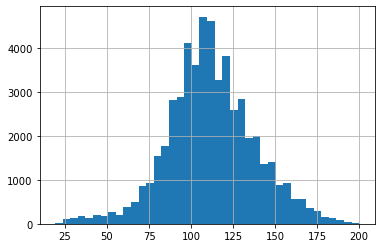

In [215]:
#Show distribution of users based on number of books rated
ratings_per_user = ratings.groupby('user_id').user_id.apply( lambda x: len( x ))
ratings_per_user.hist(bins=40)
ratings_per_user.describe()

The dataset contains only users who have rated at least 19 books and average user has rated 111 books. The max user has rated 200 books implying reading and rating a book a month for 16 years :-)

In [216]:
#ratings.boxplot(column='rating')
#ratings.rating.describe()
ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: len( x ))
ratings_per_book.describe()

count    10000.00
mean       597.65
std       1267.29
min          8.00
25%        155.00
50%        248.00
75%        503.00
max      22806.00
Name: book_id, dtype: float64

Each book has at least 8 ratings and average book has 248 ratings from a user. Note: User is somebody who has rated at least 19 books.

# The Books with most ratings are:

In [217]:
book_id = ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_most_ratings = books.iloc[book_id].original_title.to_list()
print (*popularity_most_ratings, sep='\n')

Harry Potter and the Philosopher's Stone
Twilight
The Great Gatsby
To Kill a Mockingbird
The Fault in Our Stars
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
 The Fellowship of the Ring
Harry Potter and the Goblet of Fire
The Catcher in the Rye


# The Books with best average ratings
Note: ratings only from user who has rated at least 19 books.

In [221]:
avg_ratings_per_book = ratings.groupby('book_id').rating.mean()
high_rated_books = avg_ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
popularity_avg_ratings = books.iloc[high_rated_books].title.to_list()
print (*popularity_avg_ratings, sep='\n')
avg_ratings_per_book.head()
#avg_ratings_per_book.sort_values(ascending=False).head()
#books.iloc[7947]
#ratings_per_book[high_rated_books]

Ranma ½, Vol. 1 (Ranma ½ (US 2nd), #1)
Wired (Wired, #1)
Crewel (Crewel World, #1)
Funny in Farsi: A Memoir of Growing Up Iranian in America
The Case-Book of Sherlock Holmes
Boys Over Flowers: Hana Yori Dango, Vol. 1 (Boys Over Flowers, #1)
Cloudstreet
Avatar: The Last Airbender (The Promise, #1)
Skeleton Key (Alex Rider, #3)
Dreamland


book_id
1    4.28
2    4.35
3    3.21
4    4.33
5    3.77
Name: rating, dtype: float64

In [219]:
books_summary_expert_rating= books_summary.merge( avg_ratings_per_book, on = 'book_id')
books_summary_expert_rating["deviation"] = books_summary_expert_rating["rating"]-books_summary_expert_rating["average_rating"]
book_classics = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] < 1940]
book_modern = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] >= 1940]

avg_expert_rating_classics = book_classics['average_rating'].mean()
avg_expert_rating_modern = book_modern['average_rating'].mean()
#print (avg_expert_rating_classics, avg_expert_rating_modern)
#underrated books
#books_summary_expert_rating.sort_values(by=['deviation','rating','work_text_reviews_count'],ascending=False).head(10)
#book_classics.sort_values(by=['original_publication_year'])[240:260]
#book_classics.sort_values(by=['work_text_reviews_count'])


The following compilation of authors and books is recommended by Mortimer Adler's reading list from the book 'How to Read'. 
Several Authors are not in dataset as they may not have enough ratings/reviews. Mostly Scientific Works.
Furthermore, several classics from eastern civilization are absent and the list should be extended.

In [235]:
#Classics in dataset recommended by Mortimer Adler's reading list. 
#Authors
authors = ['Homer', 'Aeschylus', 'Sophocles', 'Herodotus', 'Euripides', 'Thucydides', 'Hippocrates', 'Aristophanes', 'Plato', 'Aristotle', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 'Lucretius', 'Virgil', 'Horace', 'Livy', 'Ovid', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 'Lucian', 'Aurelius', 'Galen', 'Plotinus', 'Augustine', 'Aquinas', 'Alighieri', 'Chaucer', 'Vinci', 'Machiavelli', 'Erasmus', 'Copernicus', 'More', 'Luther', 'Rabelais', 'Calvin', 'Montaigne', 'Gilbert', 'Cervantes', 'Spenser', 'Bacon', 'Shakespeare', 'Galilei', 'Kepler', 'Harvey', 'Hobbes', 'Descartes', 'Milton', 'Molière', 'Pascal', 'Huygens', 'Spinoza', 'Locke', 'Racine', 'Newton', 'Leibniz', 'Defoe', 'Swift', 'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Voltaire', 'Fielding', 'Johnson', 'Hume', 'Rousseau', 'Sterne', 'Smith', 'Kant', 'Gibbon', 'Boswell', 'Lavoisier', 'Madison', 'Bentham', 'Goethe', 'Fourier', 'Hegel', 'Wordsworth', 'Coleridge', 'Austen', 'Clausewitz', 'Stendhal', 'Byron', 'Schopenhauer', 'Faraday', 'Lyell', 'Comte', 'Balzac', 'Emerson', 'Hawthorne', 'Tocqueville', 'Mill', 'Darwin', 'Dickens', 'Bernard', 'Thoreau', 'Marx', 'Eliot', 'Melville', 'Dostoevsky', 'Flaubert', 'Ibsen', 'Tolstoy', 'Twain', 'James', 'James', 'Nietzsche', 'Poincare', 'Freud', 'Shaw', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 'Santayana', 'Lenin', 'Proust', 'Russell', 'Mann', 'Einstein', 'Joyce', 'Maritain', 'Kafka', 'Toynbee', 'Sartre', 'Solzhenitsyn']

t = book_classics[book_classics['authors'].str.contains('|'.join(authors))]
t.describe()
#t.sort_values(by=['work_text_reviews_count'], ascending=False)

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation
count,212.00,212.00,212.00,2.12e+02,212.00,212.00,212.00
mean,4066.43,1539.29,3.88,1.08e+05,2530.60,3.82,-0.06
std,3054.70,711.47,0.22,2.35e+05,4495.36,0.23,0.06
min,10.00,-762.00,3.09,9.34e+03,57.00,2.99,-0.27
25%,1205.00,1603.00,3.76,1.59e+04,565.75,3.69,-0.10
50%,3597.00,1834.50,3.88,3.20e+04,1064.00,3.81,-0.06
75%,6715.75,1884.50,4.01,8.56e+04,2615.25,3.96,-0.03
max,9995.00,1939.00,4.63,2.19e+06,49152.00,4.62,0.18


In [ ]:
https://www.nytimes.com/2017/06/01/opinion/sunday/popular-people-live-longer.html